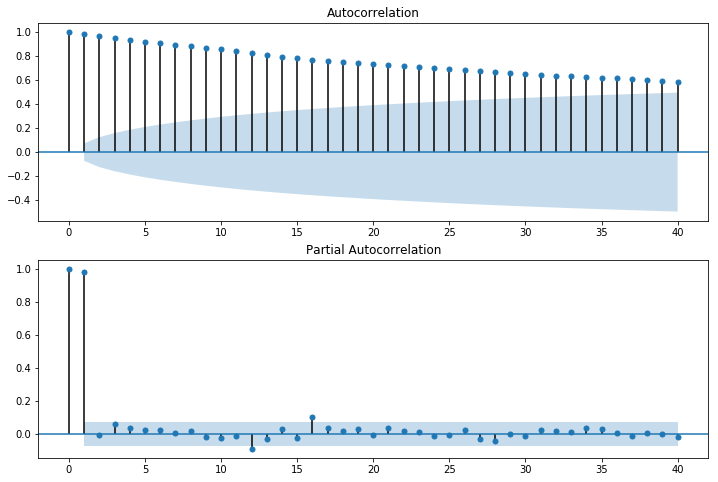

                             ARIMA Model Results                              
Dep. Variable:                D.Wages   No. Observations:                  727
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -733.649
Method:                       css-mle   S.D. of innovations              0.664
Date:                Wed, 28 Mar 2018   AIC                           1475.298
Time:                        18:03:20   BIC                           1493.654
Sample:                    06-14-2003   HQIC                          1482.382
                         - 06-09-2005                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0506      0.024      2.080      0.038       0.003       0.098
ar.L1.D.Wages     0.1486      0.037      4.053      0.000       0.077       0.221
ar.L2.D.Wages    -0.1610      0.037     

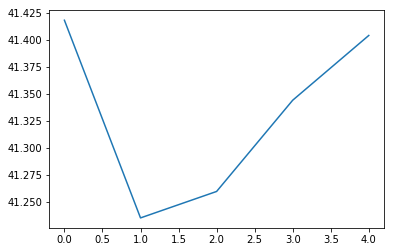

In [41]:
%matplotlib inline
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glsar
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from datetime import datetime

df = pd.read_csv('~/Downloads/real-daily-wages-in-pounds-engla.csv')
df['Year'] = pd.to_datetime(df['Year'], format=('%m/%d/%y'))
df = df.set_index('Year')


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)
plt.show()

#print(sm.tsa.stattools.adfuller(df))

model=sm.tsa.ARIMA(endog=df,order=(2,1,0))
results=model.fit()
print(results.summary())

forecast,std,conf=results.forecast(5)
print ('\n\nThe next 5 days are predicted to have these wages:\n')
print forecast
print
plt.plot(forecast)


In [19]:
print 

0     2003-06-13
1     2003-06-14
2     2003-06-15
3     2003-06-16
4     2003-06-17
5     2003-06-18
6     2003-06-19
7     2003-06-20
8     2003-06-21
9     2003-06-22
10    2003-06-23
11    2003-06-24
12    2003-06-25
13    2003-06-26
14    2003-06-27
15    2003-06-28
16    2003-06-29
17    2003-06-30
18    2003-07-01
19    2003-07-02
20    2003-07-03
21    2003-07-04
22    2003-07-05
23    2003-07-06
24    2003-07-07
25    2003-07-08
26    2003-07-09
27    2003-07-10
28    2003-07-11
29    2003-07-12
         ...    
698   2005-05-11
699   2005-05-12
700   2005-05-13
701   2005-05-14
702   2005-05-15
703   2005-05-16
704   2005-05-17
705   2005-05-18
706   2005-05-19
707   2005-05-20
708   2005-05-21
709   2005-05-22
710   2005-05-23
711   2005-05-24
712   2005-05-25
713   2005-05-26
714   2005-05-27
715   2005-05-28
716   2005-05-29
717   2005-05-30
718   2005-05-31
719   2005-06-01
720   2005-06-02
721   2005-06-03
722   2005-06-04
723   2005-06-05
724   2005-06-06
725   2005-06-

In [54]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# load the dataset
dataframe = pd.read_csv('~/Downloads/real-daily-wages-in-pounds-engla.csv')
dataframe['Year'] = pd.to_datetime(dataframe['Year'], format=('%m/%d/%y'))
dataframe = dataframe.set_index('Year')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

(492, 243)
Epoch 1/50
 - 3s - loss: 0.0014
Epoch 2/50
 - 1s - loss: 0.0010
Epoch 3/50
 - 1s - loss: 8.4654e-04
Epoch 4/50
 - 1s - loss: 4.0753e-04
Epoch 5/50
 - 1s - loss: 1.7192e-04
Epoch 6/50
 - 1s - loss: 1.5207e-04
Epoch 7/50
 - 1s - loss: 1.5526e-04
Epoch 8/50
 - 1s - loss: 1.5290e-04
Epoch 9/50
 - 1s - loss: 1.5842e-04
Epoch 10/50
 - 1s - loss: 1.5292e-04
Epoch 11/50
 - 1s - loss: 1.5180e-04
Epoch 12/50
 - 1s - loss: 1.5755e-04
Epoch 13/50
 - 1s - loss: 1.5947e-04
Epoch 14/50
 - 1s - loss: 1.5083e-04
Epoch 15/50
 - 1s - loss: 1.5293e-04
Epoch 16/50
 - 1s - loss: 1.5180e-04
Epoch 17/50
 - 1s - loss: 1.4999e-04
Epoch 18/50
 - 1s - loss: 1.5613e-04
Epoch 19/50
 - 1s - loss: 1.5017e-04
Epoch 20/50
 - 1s - loss: 1.5586e-04
Epoch 21/50
 - 1s - loss: 1.5502e-04
Epoch 22/50
 - 1s - loss: 1.5130e-04
Epoch 23/50
 - 1s - loss: 1.5490e-04
Epoch 24/50
 - 1s - loss: 1.5323e-04
Epoch 25/50
 - 1s - loss: 1.5352e-04
Epoch 26/50
 - 1s - loss: 1.5476e-04
Epoch 27/50
 - 1s - loss: 1.5667e-04
Epoch 2

In [55]:
print testPredict

[[ 6.4610457]
 [ 6.7224565]
 [ 6.778557 ]
 [ 6.6850715]
 [ 6.741153 ]
 [ 5.755047 ]
 [ 5.958853 ]
 [ 6.358533 ]
 [ 6.5356665]
 [ 6.8627644]
 [ 6.9002094]
 [ 6.55433  ]
 [ 6.4703703]
 [ 6.2747383]
 [ 6.2654324]
 [ 6.200316 ]
 [ 6.3026614]
 [ 7.0407424]
 [ 6.8908467]
 [ 6.489022 ]
 [ 5.9959598]
 [ 5.9403057]
 [ 6.1259527]
 [ 6.3305926]
 [ 6.3119717]
 [ 6.741153 ]
 [ 6.3026614]
 [ 6.703762 ]
 [ 6.853404 ]
 [ 6.629019 ]
 [ 6.6477003]
 [ 6.060932 ]
 [ 6.2654324]
 [ 6.6477003]
 [ 6.778557 ]
 [ 6.956402 ]
 [ 6.7972646]
 [ 7.0970035]
 [ 6.778557 ]
 [ 7.0126214]
 [ 7.0219946]
 [ 6.7131085]
 [ 6.4423985]
 [ 6.033081 ]
 [ 5.819843 ]
 [ 6.163127 ]
 [ 6.2747383]
 [ 5.921762 ]
 [ 4.6159425]
 [ 4.3793645]
 [ 5.755047 ]
 [ 6.5076766]
 [ 6.4144354]
 [ 5.6440835]
 [ 5.819843 ]
 [ 5.921762 ]
 [ 5.560957 ]
 [ 5.496361 ]
 [ 5.7735553]
 [ 5.8013253]
 [ 5.073189 ]
 [ 4.9540234]
 [ 5.7180424]
 [ 6.2375197]
 [ 6.909573 ]
 [ 6.3026614]
 [ 6.153831 ]
 [ 6.2096148]
 [ 7.3317084]
 [ 8.530206 ]
 [ 9.488991 ]
 [ 9.2